In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# importing the churn_raw_data.csv through the file path
df = pd.read_csv('/Users/justinhuynh/Desktop/churn_clean.csv')
# check all information about this file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [90]:
# select variables that are relevant only to our analysis
relevant_columns = ['MonthlyCharge', 'Age', 'Income', 'Bandwidth_GB_Year', 'Outage_sec_perweek', 'Contacts', 'Yearly_equip_failure', 'Gender', 'Marital', 'Techie', 'Contract', 'InternetService', 'PaperlessBilling', 'PaymentMethod']
df = df[relevant_columns]

In [91]:
# check for and handle missing values
df.isnull().sum()

MonthlyCharge           0
Age                     0
Income                  0
Bandwidth_GB_Year       0
Outage_sec_perweek      0
Contacts                0
Yearly_equip_failure    0
Gender                  0
Marital                 0
Techie                  0
Contract                0
InternetService         0
PaperlessBilling        0
PaymentMethod           0
dtype: int64

In [92]:
# convert relevant categorical variables to numerical using one-hot encoding
relevant_categorical_vars = ['Gender', 'Marital', 'Techie', 'Contract', 'InternetService', 'PaperlessBilling', 'PaymentMethod']

df_encoded = pd.get_dummies(df, columns=relevant_categorical_vars, drop_first=True)

In [93]:
# verify data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MonthlyCharge         10000 non-null  float64
 1   Age                   10000 non-null  int64  
 2   Income                10000 non-null  float64
 3   Bandwidth_GB_Year     10000 non-null  float64
 4   Outage_sec_perweek    10000 non-null  float64
 5   Contacts              10000 non-null  int64  
 6   Yearly_equip_failure  10000 non-null  int64  
 7   Gender                10000 non-null  object 
 8   Marital               10000 non-null  object 
 9   Techie                10000 non-null  object 
 10  Contract              10000 non-null  object 
 11  InternetService       10000 non-null  object 
 12  PaperlessBilling      10000 non-null  object 
 13  PaymentMethod         10000 non-null  object 
dtypes: float64(4), int64(3), object(7)
memory usage: 1.1+ MB


In [94]:
# remove duplicate rows if any
df = df.drop_duplicates()

In [95]:
# display the cleaned data
df.head()

,MonthlyCharge,Age,Income,Bandwidth_GB_Year,Outage_sec_perweek,Contacts,Yearly_equip_failure,Gender,Marital,Techie,Contract,InternetService,PaperlessBilling,PaymentMethod
0,172.455519,68,28561.99,904.536110,7.978323,0,1,Male,Widowed,No,One year,Fiber Optic,Yes,Credit Card (automatic)
1,242.632554,27,21704.77,800.982766,11.699080,0,1,Female,Married,Yes,Month-to-month,Fiber Optic,Yes,Bank Transfer(automatic)
2,159.947583,50,9609.57,2054.706961,10.752800,0,1,Female,Widowed,Yes,Two Year,DSL,Yes,Credit Card (automatic)
3,119.956840,48,18925.23,2164.579412,14.913540,2,0,Male,Married,Yes,Two Year,DSL,Yes,Mailed Check
4,149.948316,83,40074.19,271.493436,8.147417,2,1,Male,Separated,No,Month-to-month,Fiber Optic,No,Mailed Check


In [96]:
# summary statistics for the dependent variable and independent continuous variables
summary_stats = df[['MonthlyCharge', 'Age', 'Income', 'Bandwidth_GB_Year', 'Outage_sec_perweek', 'Contacts', 'Yearly_equip_failure']].describe()
print(summary_stats)

       MonthlyCharge           Age         Income  Bandwidth_GB_Year  \
count   10000.000000  10000.000000   10000.000000       10000.000000   
mean      172.624816     53.078400   39806.926771        3392.341550   
std        42.943094     20.698882   28199.916702        2185.294852   
min        79.978860     18.000000     348.670000         155.506715   
25%       139.979239     35.000000   19224.717500        1236.470827   
50%       167.484700     53.000000   33170.605000        3279.536903   
75%       200.734725     71.000000   53246.170000        5586.141370   
max       290.160419     89.000000  258900.700000        7158.981530   

       Outage_sec_perweek      Contacts  Yearly_equip_failure  
count        10000.000000  10000.000000          10000.000000  
mean            10.001848      0.994200              0.398000  
std              2.976019      0.988466              0.635953  
min              0.099747      0.000000              0.000000  
25%              8.018214      

In [97]:
# summary statistics for categorical variables
categorical_summary_stats = df[original_categorical_vars].describe()
print(categorical_summary_stats)

        Gender   Marital Techie        Contract InternetService  \
count    10000     10000  10000           10000           10000   
unique       3         5      2               3               3   
top     Female  Divorced     No  Month-to-month     Fiber Optic   
freq      5025      2092   8321            5456            4408   

       PaperlessBilling     PaymentMethod  
count             10000             10000  
unique                2                 4  
top                 Yes  Electronic Check  
freq               5882              3398  


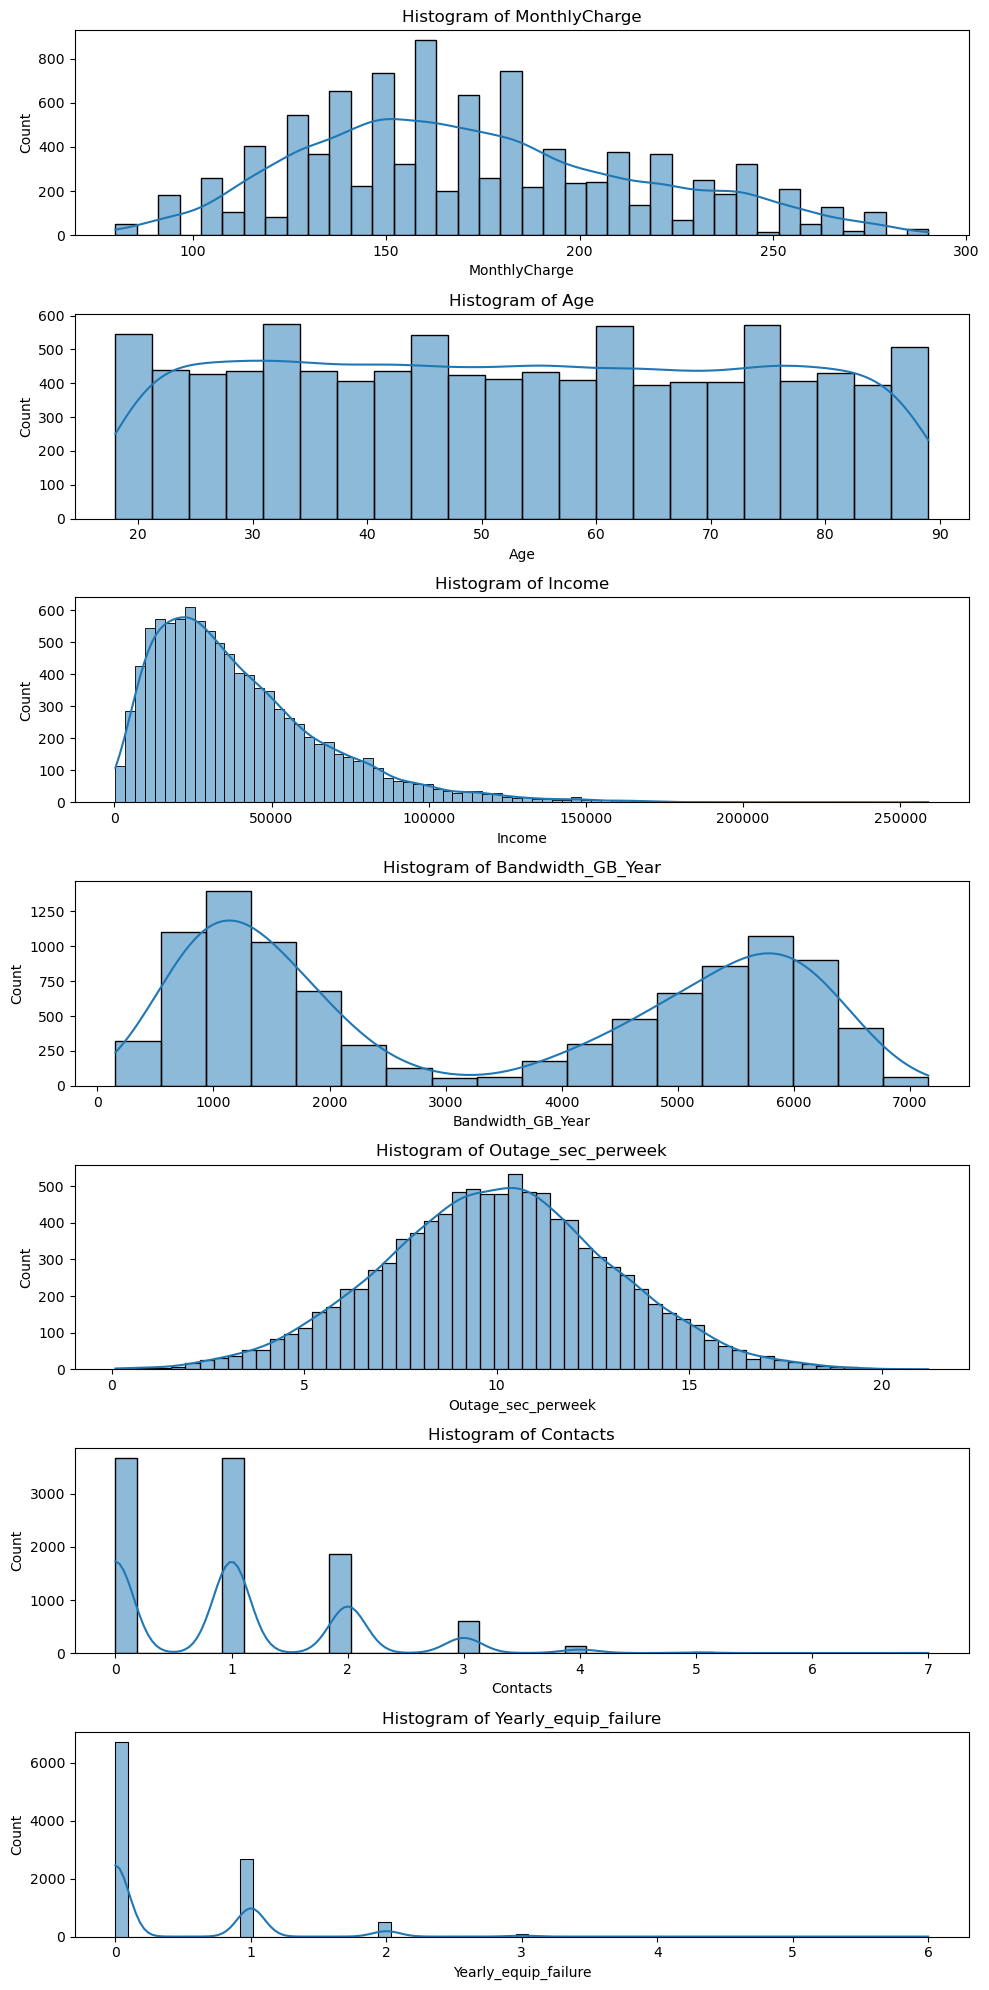

In [98]:
# univariate visualizations - histogram for continuous variables 
continuous_vars = ['MonthlyCharge', 'Age', 'Income', 'Bandwidth_GB_Year', 'Outage_sec_perweek', 'Contacts', 'Yearly_equip_failure']

fig, axes = plt.subplots(len(continuous_vars), 1, figsize=(10, 20))
for i, var in enumerate(continuous_vars):
    sns.histplot(df[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {var}')
plt.tight_layout()
plt.show()

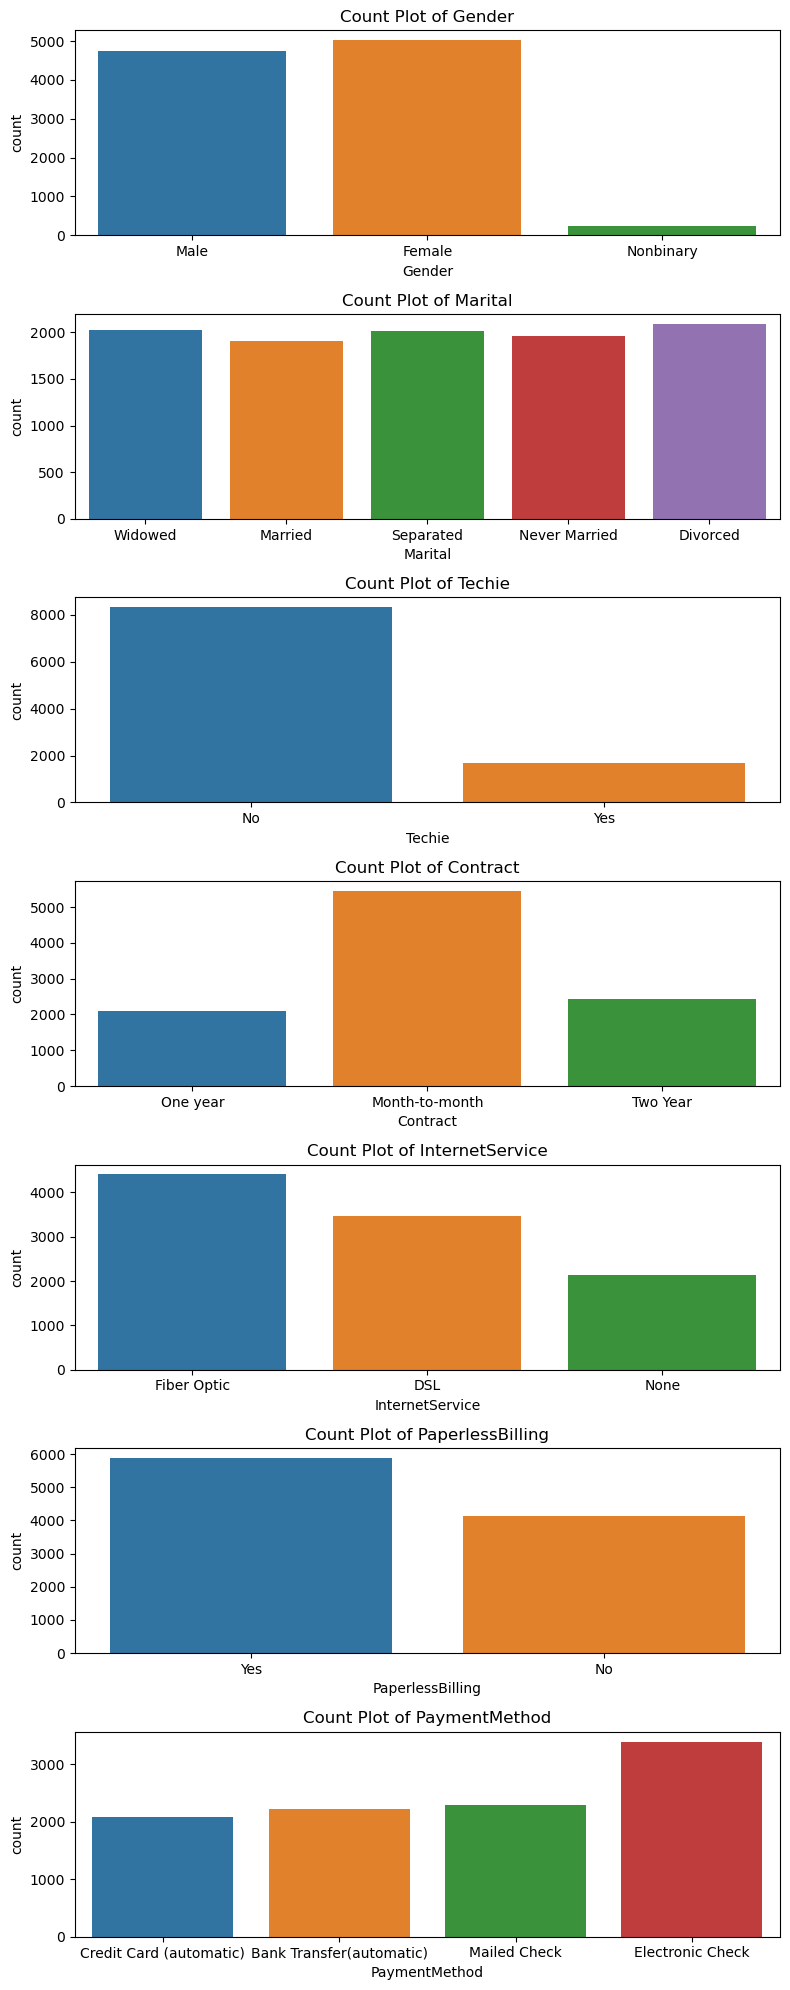

In [99]:
# univariate visualizations - bar chart for categorical variables 
categorical_vars = ['Gender', 'Marital', 'Techie', 'Contract', 'InternetService', 'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(len(categorical_vars), 1, figsize=(8, 20))
for i, var in enumerate(categorical_vars):
    sns.countplot(x=df[var], ax=axes[i])
    axes[i].set_title(f'Count Plot of {var}')
plt.tight_layout()
plt.show()

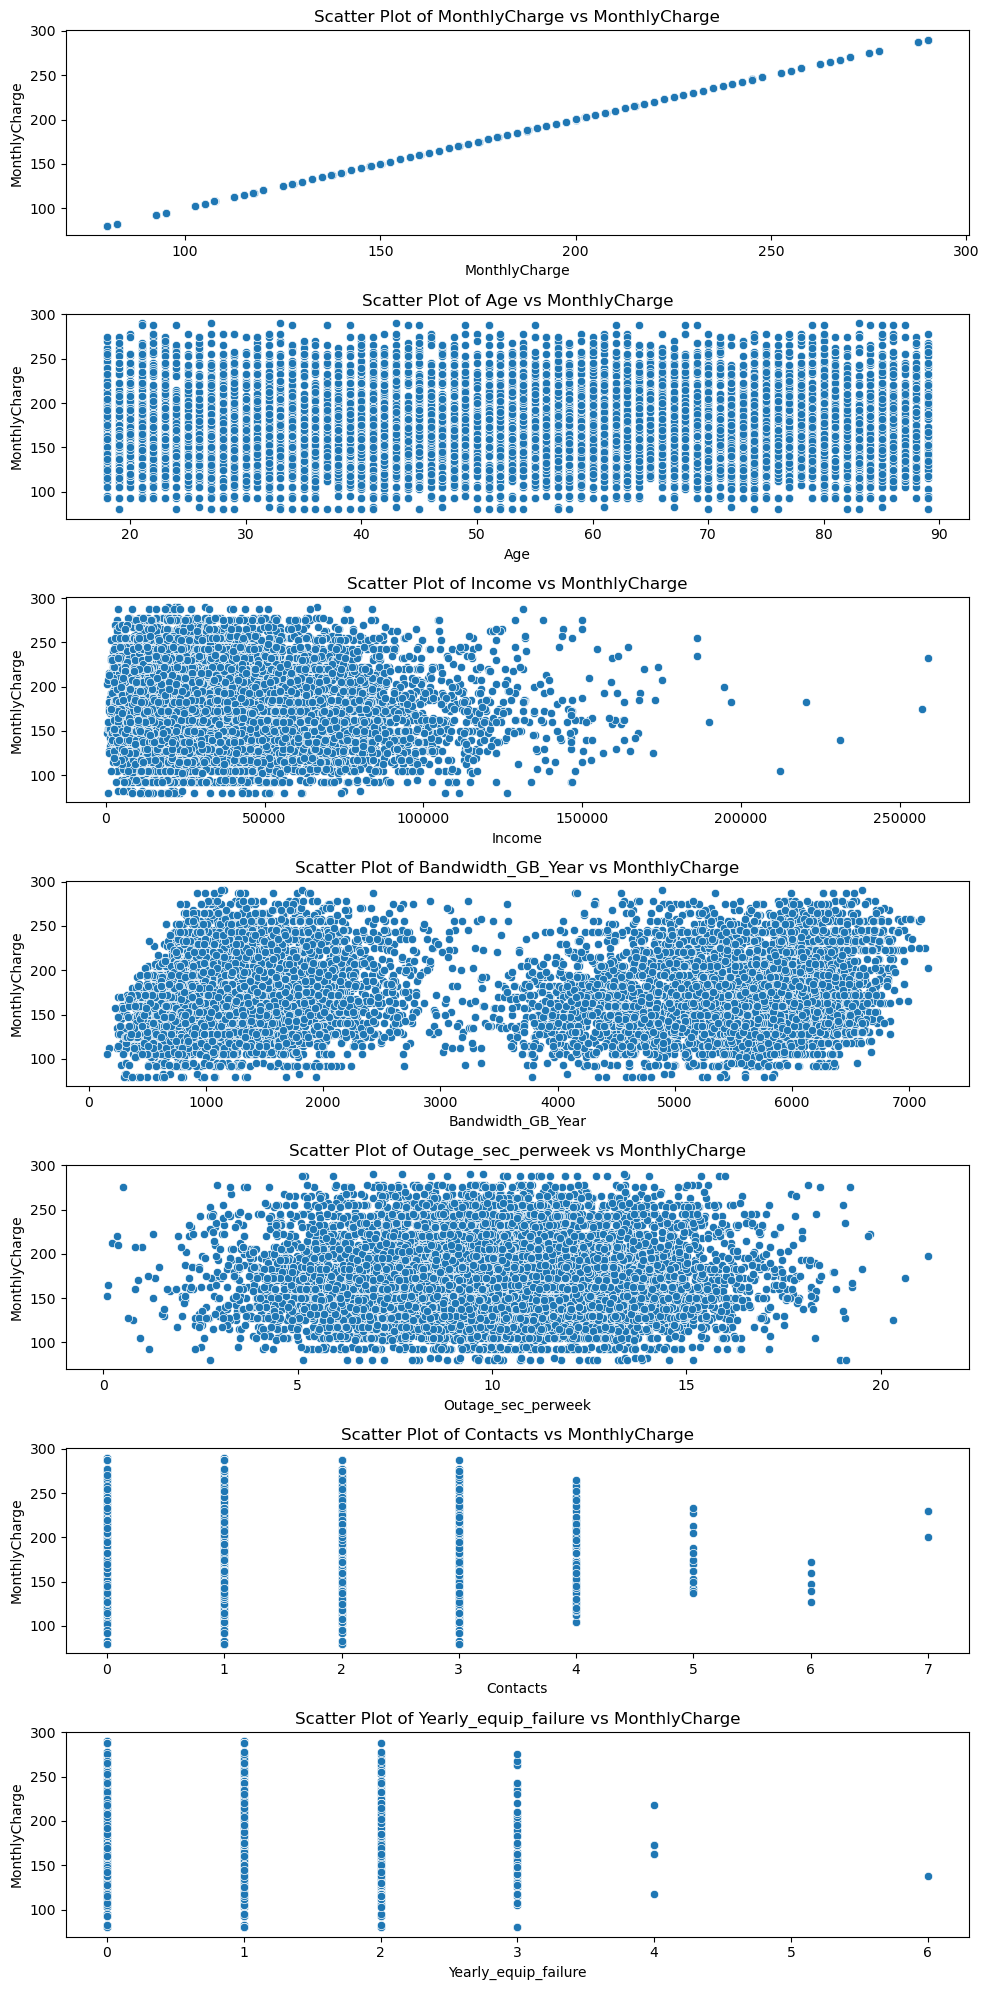

In [100]:
# bivariate visualizations - scatter plots for continuous variables vs MonthlyCharge
fig, axes = plt.subplots(len(continuous_vars), 1, figsize=(10, 20))
for i, var in enumerate(continuous_vars):
    sns.scatterplot(x=df[var], y=df['MonthlyCharge'], ax=axes[i])
    axes[i].set_title(f'Scatter Plot of {var} vs MonthlyCharge')
plt.tight_layout()
plt.show()

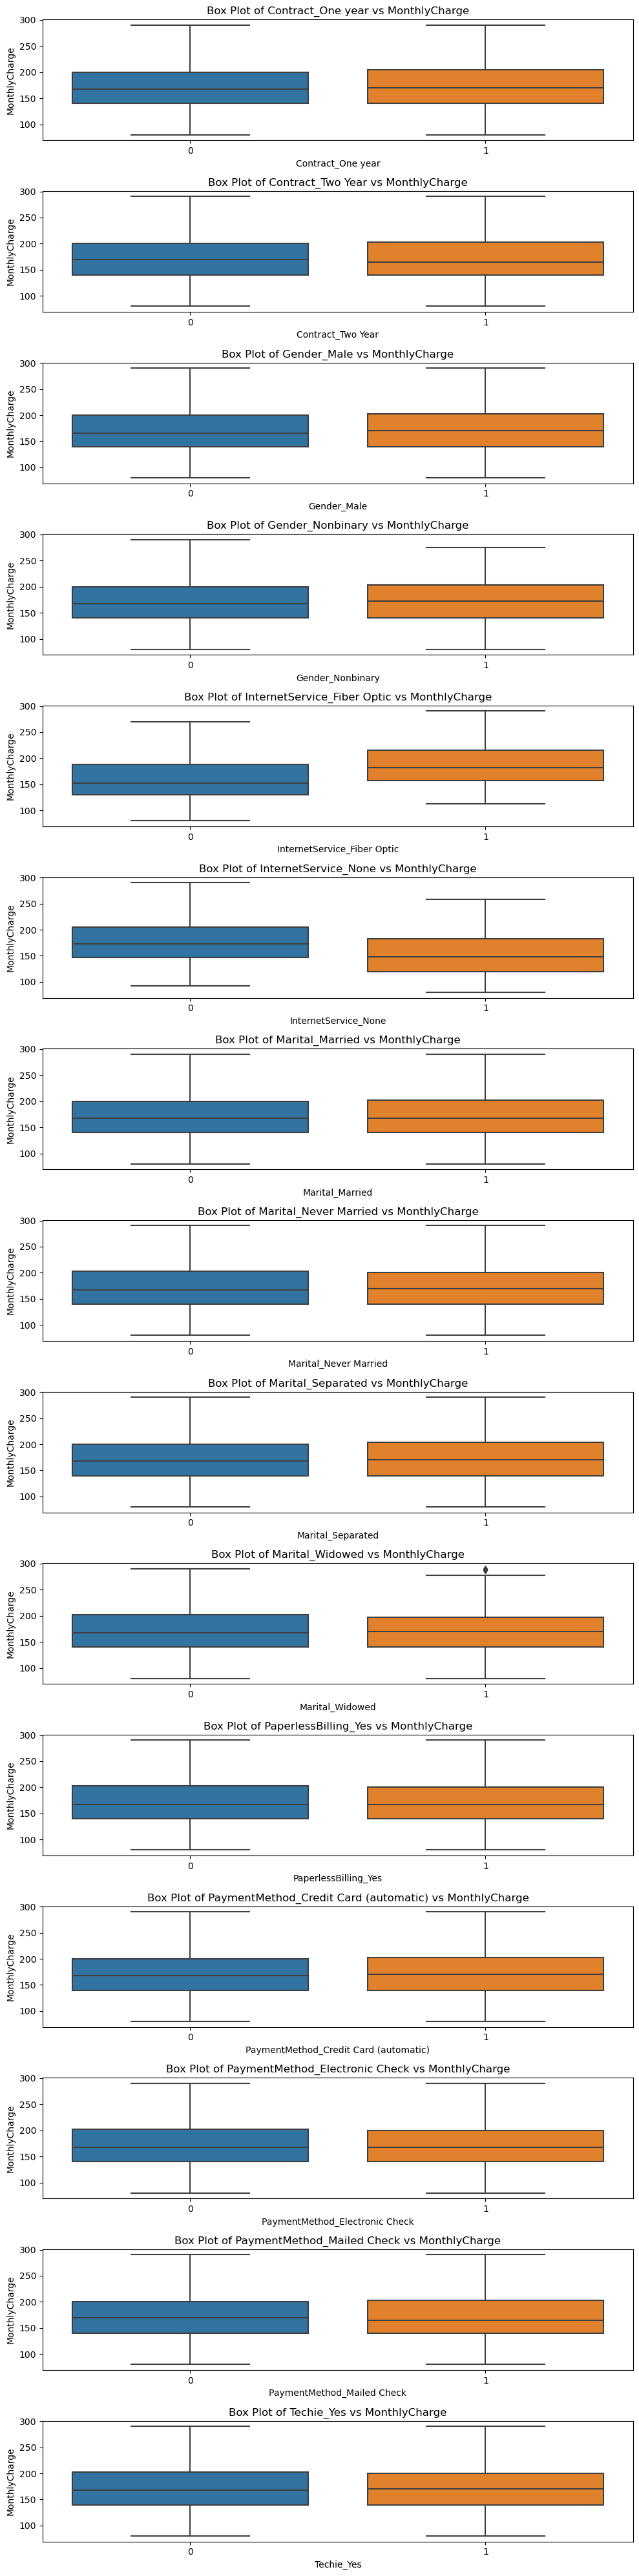

In [101]:
# bivariate visualizations - box plots for categorical variables vs MonthlyCharge
encoded_categorical_vars = df_encoded.columns.difference(['MonthlyCharge', 'Age', 'Income', 'Bandwidth_GB_Year', 'Outage_sec_perweek', 'Contacts', 'Yearly_equip_failure'])

fig, axes = plt.subplots(len(encoded_categorical_vars), 1, figsize=(10, 40))
for i, var in enumerate(encoded_categorical_vars):
    sns.boxplot(x=df_encoded[var], y=df_encoded['MonthlyCharge'], ax=axes[i])
    axes[i].set_title(f'Box Plot of {var} vs MonthlyCharge')
plt.tight_layout()
plt.show()

In [102]:
# save prepared data to csv
df_encoded.to_csv('prepared_data.csv')

In [66]:
# define dependent variable
y = df_encoded['MonthlyCharge']

# define the relevant independent variables from C2
X = df_encoded.drop(columns=['MonthlyCharge'])

# add a constant to the model (intercept)
X = sm.add_constant(X)

# fit the initial regression model
initial_model = sm.OLS(y, X).fit()

# display initial model summary
print(initial_model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     54.18
Date:                Sat, 15 Jun 2024   Prob (F-statistic):          5.28e-215
Time:                        11:16:19   Log-Likelihood:                -51248.
No. Observations:               10000   AIC:                         1.025e+05
Df Residuals:                    9978   BIC:                         1.027e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [67]:
# perform backward elimination for a more iterative approach
def backward_elimination(X, y, significance_level=0.05):
    while True:
        # fit the model
        model = sm.OLS(y, X).fit()
        
        # get p-values
        p_values = model.pvalues
        
        # get max p-value
        max_p_value = p_values.max()
        
        # check if the max p-value is greater than 0.05
        if max_p_value > significance_level:
            # get variable with the max p-value
            excluded_var = p_values.idxmax()
            
            # drop variable with the max p-value
            X = X.drop(columns=[excluded_var])
        else:
            break
    
    return model

# apply backward elimination
reduced_model = backward_elimination(X, y)

# display reduced model summary
print(reduced_model.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyCharge   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     282.0
Date:                Sat, 15 Jun 2024   Prob (F-statistic):          3.96e-230
Time:                        11:33:34   Log-Likelihood:                -51253.
No. Observations:               10000   AIC:                         1.025e+05
Df Residuals:                    9995   BIC:                         1.026e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

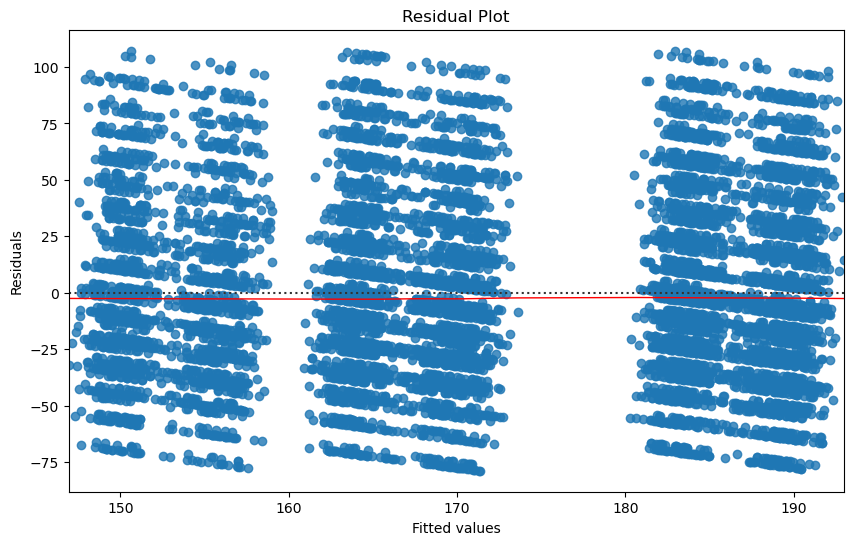

In [68]:
# residual plot for the reduced model
plt.figure(figsize=(10, 6))
sns.residplot(x=reduced_model.fittedvalues, y=reduced_model.resid, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [69]:
# Residual Standard Error (RSE)
rse = reduced_model.mse_resid ** 0.5
print(f"Residual Standard Error (RSE): {rse}")

Residual Standard Error (RSE): 40.71531103844988


In [103]:
# extract metrics from initial model
initial_r_squared = initial_model.rsquared
initial_adj_r_squared = initial_model.rsquared_adj

# extract metrics from reduced model
reduced_r_squared = reduced_model.rsquared
reduced_adj_r_squared = reduced_model.rsquared_adj

print(f"Initial Model Metrics:\n"
      f"R-squared: {initial_r_squared}\n"
      f"Adjusted R-squared: {initial_adj_r_squared}\n")

print(f"\nReduced Model Metrics:\n"
      f"R-squared: {reduced_r_squared}\n"
      f"Adjusted R-squared: {reduced_adj_r_squared}\n")

Initial Model Metrics:
R-squared: 0.10235548075695566
Adjusted R-squared: 0.1004662710050912


Reduced Model Metrics:
R-squared: 0.1014234548414038
Adjusted R-squared: 0.10106384441812877

